# Exploratory Data Analysis on Superstore_USA-dataset

## Introduction
This project aims to perform an exploratory data analysis (EDA) on the Superstore_USA-dataset dataset to uncover patterns and insights.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# Load the dataset
data = pd.read_excel("Superstore_USA.xlsx")

In [6]:
# Display the first few rows
data.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [7]:
data.shape

(9426, 24)

In [9]:
# Check for missing values
data.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [162]:
# In this step We fill the missing values in numerical columns using the mean method to ensure the dataset is complete and ready for analysis.
data["Product Base Margin"].fillna(data["Product Base Margin"].mean(), inplace=True)

In [17]:
data["Order Priority"].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: count, dtype: int64

In [18]:
data["Order Priority"].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [19]:
data["Order Priority"] = data["Order Priority"].replace("Critical ",'Critical')

In [20]:
data["Order Priority"].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

## Analysis of Order Priority Counts
In this section, we analyze the count of order priorities in the e-commerce data. Order priorities can include values such as 'High', 'Medium', 'Low', and 'Critical'. We visualize the distribution using a count plot to show the frequency of each order priority.

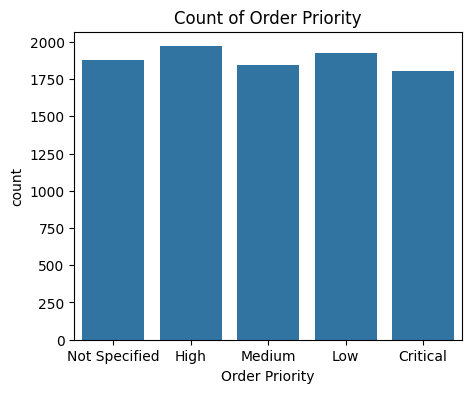

In [27]:
plt.figure(figsize=(5,4))
sns.countplot(x="Order Priority",data =data)
plt.title("Count of Order Priority")
plt.show()

## Analysis of Shipping Modes
In this section, we analyze the distribution of different shipping modes used in the e-commerce data. The shipping modes include Regular Air, Express Air, and Delivery Truck. We visualize the distribution using a pie chart to show the percentage share of each shipping mode.

In [63]:
inx = data["Ship Mode"].value_counts().index
val = data["Ship Mode"].value_counts().values

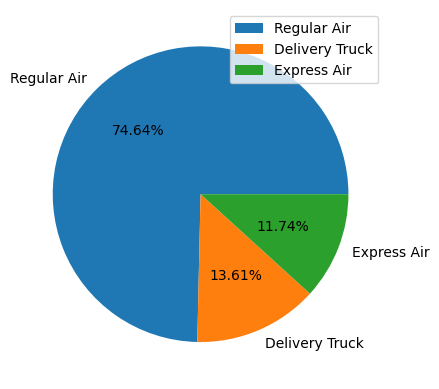

In [69]:
plt.pie(val,labels = inx,autopct="%0.2f%%" )
plt.legend()
plt.title("")
plt.show() 

# Plot a countplot for product categories by shipping modes
In this section, we analyze the distribution of product categories for each shipping mode. We visualize the distribution using a countplot to show the frequency of each product category for the different shipping modes.

<Axes: xlabel='Ship Mode', ylabel='count'>

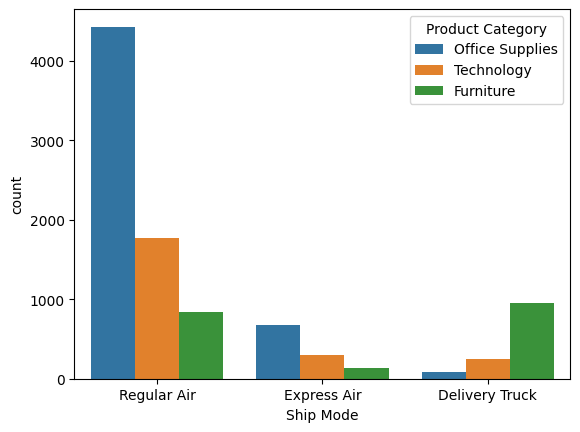

In [71]:
sns.countplot(x = "Ship Mode", data = data,hue = "Product Category")

## Analysis of Customer Segments
In this section, we analyze the distribution of customer segments in the e-commerce data. The customer segments include Corporate, Home Office, Small Business, and Consumer. We visualize the distribution using a bar plot to show the frequency of each customer segment.

The analysis reveals that the Corporate segment has the highest count, while the Consumer segment has the lowest count.

<Axes: xlabel='Customer Segment', ylabel='count'>

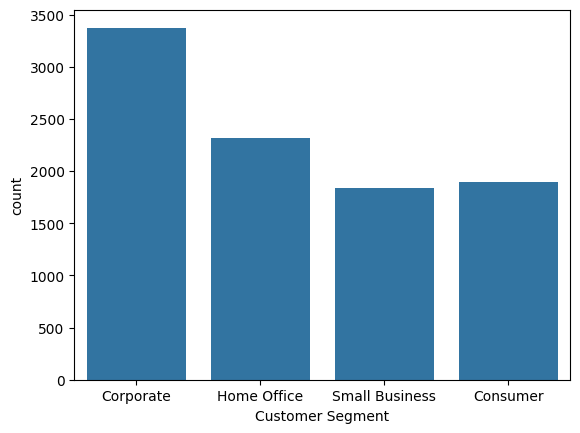

In [74]:
sns.countplot(x="Customer Segment", data = data)

# Analysis of Product Category Sales
# Conclusion
In summary:
Office Supplies demonstrate high sales, indicating strong demand and revenue potential.
Technology shows moderate sales, suggesting ongoing consumer interest and room for growth through innovation.
Furniture lags behind, signaling either niche market appeal or subdued demand.
Understanding these dynamics aids in strategic decision-making, resource allocation, and marketing strategies for maximizing profitability in the e-commerce domain.

<Axes: xlabel='Product Category', ylabel='count'>

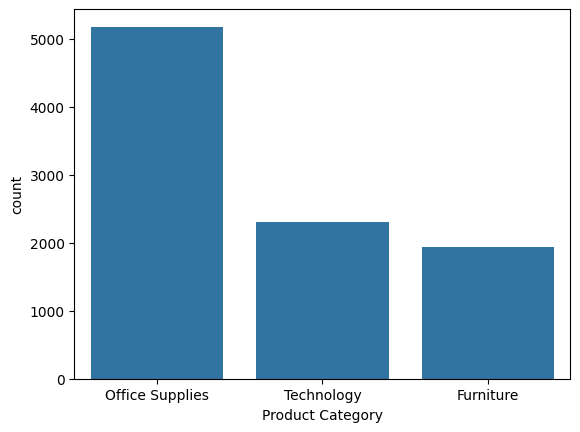

In [75]:
sns.countplot(x="Product Category", data = data)

# Analyzing sales according to product subcategories within Office Supplies, Technology, and Furniture:

# Office Supplies

<Axes: xlabel='Product Category', ylabel='count'>

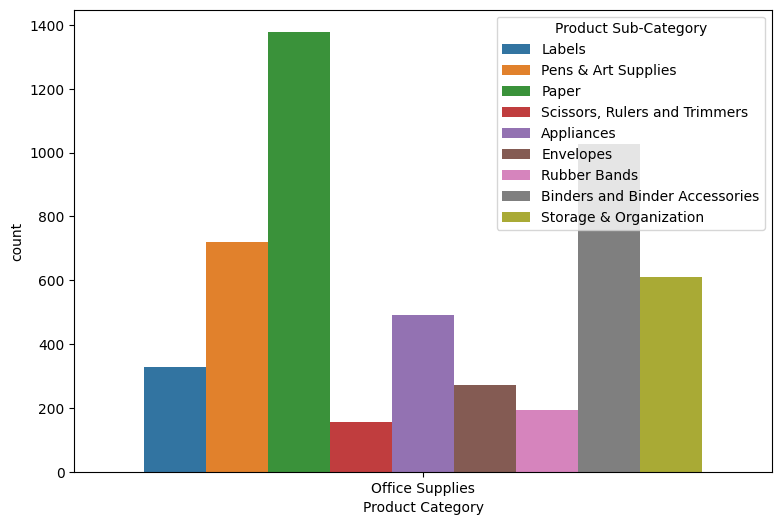

In [93]:
plt.figure(figsize=(9,6))
sns.countplot(x="Product Category", data = data[data["Product Category"]== "Office Supplies"], hue="Product Sub-Category")

# Technology

<Axes: xlabel='Product Category', ylabel='count'>

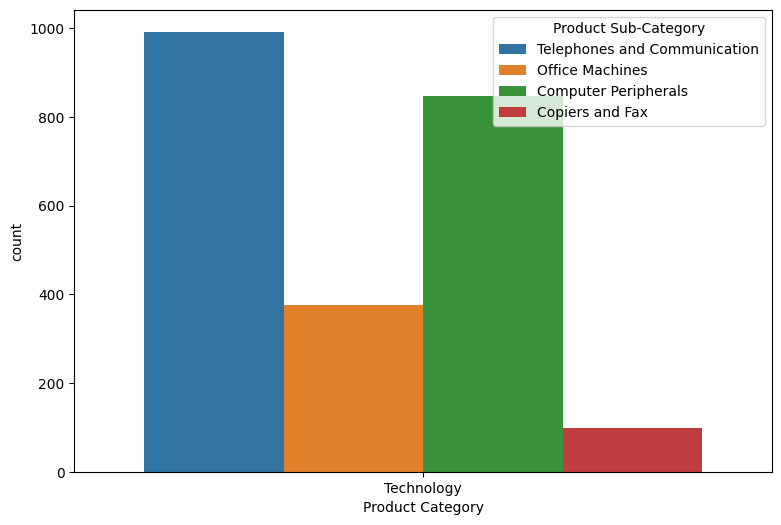

In [96]:
plt.figure(figsize=(9,6))
sns.countplot(x="Product Category", data = data[data["Product Category"]== "Technology"], hue="Product Sub-Category")

#  Furniture

In [95]:
data["Product Category"].value_counts()

Product Category
Office Supplies    5181
Technology         2312
Furniture          1933
Name: count, dtype: int64

<Axes: xlabel='Product Category', ylabel='count'>

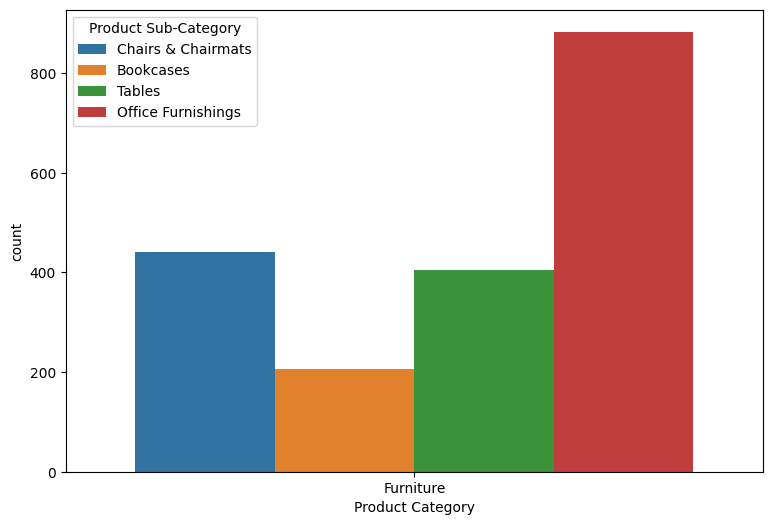

In [97]:
plt.figure(figsize=(9,6))
sns.countplot(x="Product Category", data = data[data["Product Category"]== "Furniture"], hue="Product Sub-Category")

## Analysis of Growth According to Order Date
In this section, we analyze the growth trends based on the order date. We extract the year from the order date and calculate the number of orders placed in each year from 2010 to 2013. We visualize the trend using a count plot to observe how the number of orders changes over time.
## Conclusions and Insights
Based on the analysis of growth according to the order date, we found the following insights:
- The number of orders placed has been increasing steadily over the years from 2010 to 2013.
- This growth trend suggests a positive trajectory in sales and indicates potential business expansion opportunities.
- Understanding the growth patterns can help in forecasting future sales, allocating resources effectively, and planning for business scalability.

<Axes: xlabel='Order Date', ylabel='count'>

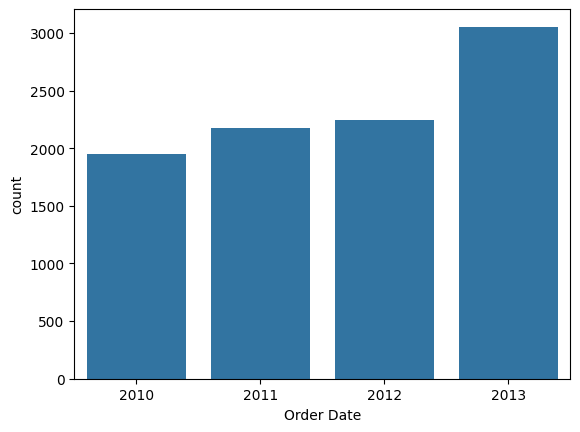

In [121]:
sns.countplot(x=data["Order Date"].dt.year,data=data)

In [155]:
data.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


## Analysis of Profitability by Product Categories
In this section, we analyze the profitability of different product categories in the e-commerce data. The product categories include Technology, Office Supplies, and Furniture. We categorize the profitability levels as high, medium, and low based on the profit margins observed for each category.
## Conclusions and Insights
Based on the analysis of profitability by product categories, we found the following insights:
- Technology products have high profitability, indicating higher margins and profitability compared to other categories.
- Office Supplies have medium profitability, suggesting moderate margins and profitability levels.
- Furniture products have low profitability, indicating lower margins and profitability compared to Technology and Office Supplies categories.
- Understanding the profitability of different product categories can help in optimizing pricing strategies, inventory management, and resource allocation.


<Axes: xlabel='Product Category', ylabel='Profit'>

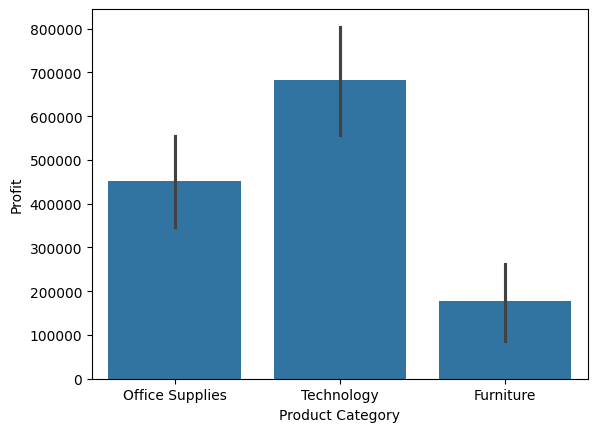

In [154]:
sns.barplot(x = data["Product Category"], y =data["Profit"],data=data ,estimator="sum")

## Analysis of Top 5 Most Sales States
In this section, we analyze the total sales for each state in the e-commerce data. We identify the top 5 states with the highest sales and visualize the distribution using a bar plot.

## Conclusions and Insights
Based on the analysis of the top 5 most sales states, we found the following insights:
- California has the highest sales, followed by Texas, illinois, New York, and Florida.
- These top 5 states contribute significantly to the overall sales revenue.
- Understanding the sales performance of these states can help in targeting marketing efforts and optimizing supply chain logistics.

In [147]:
sales = data["State or Province"].value_counts()[:5]
state = data["State or Province"].value_counts().index[:5]


<Axes: xlabel='State or Province', ylabel='count'>

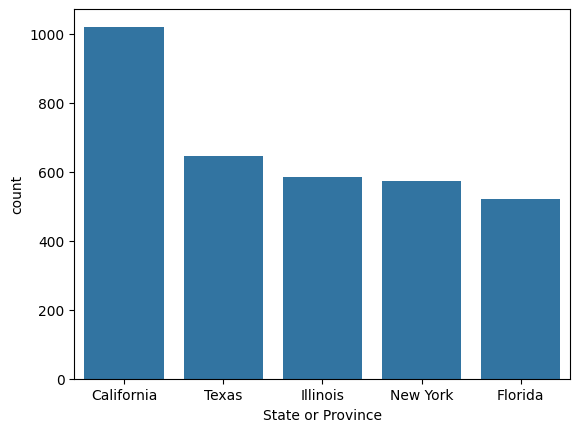

In [150]:
sns.barplot(y=sales,x=state)

## Analysis of Margins on Product Categories
In this section, we analyze the margins on different product categories in the e-commerce data. The product categories include Office Supplies, Technology, and Furniture. We visualize the distribution of margins using descriptive statistics and provide insights into their variability.
## Conclusions and Insights
Based on the analysis of margins on product categories, we found the following insights:
- Office Supplies have the highest margin, indicating higher profitability in this category.
- Technology products have medium margins, suggesting moderate profitability.
- Furniture products have the lowest margins, indicating lower profitability compared to other categories.

These insights can help in understanding the profitability of different product categories and making strategic decisions regarding pricing, promotions, and inventory management.

<Axes: xlabel='Product Category', ylabel='Product Base Margin'>

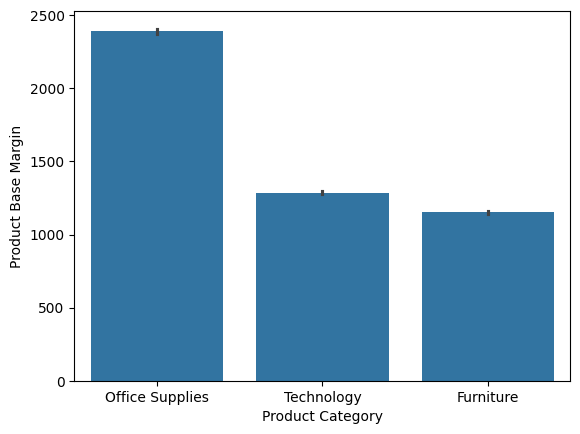

In [160]:
sns.barplot(x=data["Product Category"],y=data["Product Base Margin"],estimator="sum")